In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
#Load the datasets
moviesdf = pd.read_csv('/content/movies.csv')
linksdf = pd.read_csv('/content/links.csv')
ratingsdf = pd.read_csv('/content/ratings.csv')
tagsdf = pd.read_csv('/content/tags.csv')

In [63]:
moviesdf.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


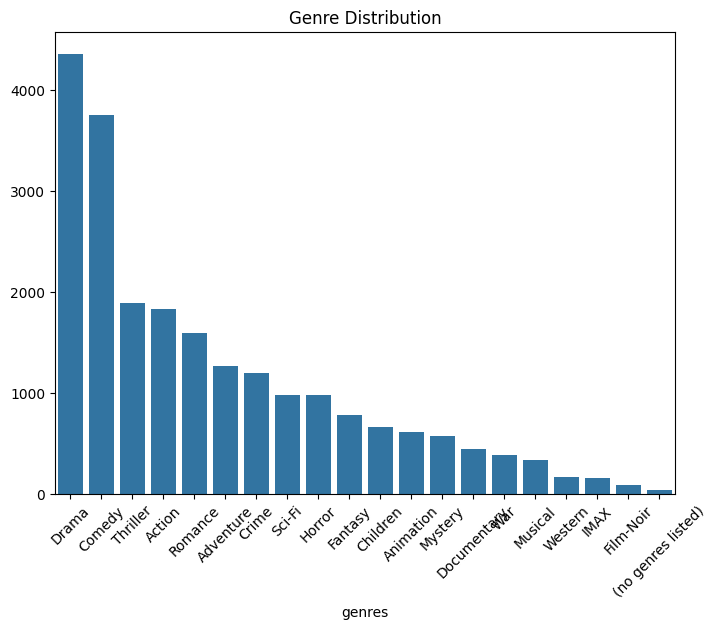

In [7]:
genre_counts = moviesdf['genres'].str.split('|').explode().value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=45)
plt.title('Genre Distribution')
plt.show()

In [8]:
linksdf

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [9]:
ratingsdf

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [10]:
tagsdf

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [11]:
#Fill missing value
linksdf = linksdf.fillna('')
moviesdf = moviesdf.fillna("")
ratingsdf = ratingsdf.fillna("")
tagsdf = tagsdf.fillna('')

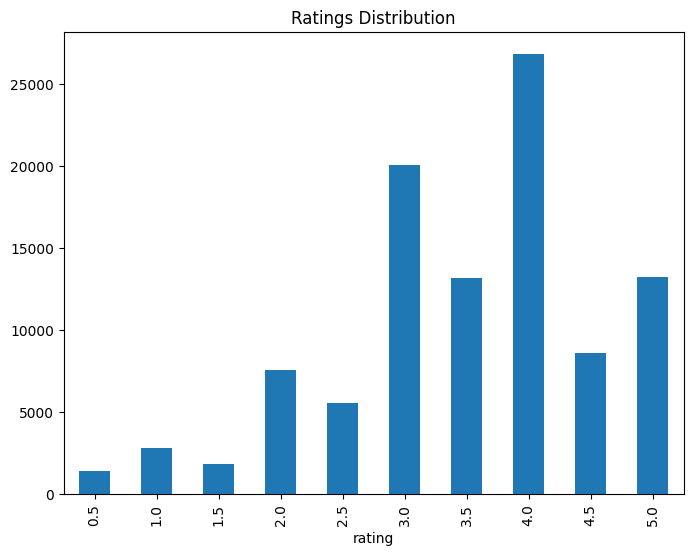

In [12]:
# Ratings distribution
plt.figure(figsize=(8, 6))
ratingsdf.groupby('rating').size().plot(kind='bar', title='Ratings Distribution')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
# Normalize ratings
scaler = StandardScaler()
ratingsdf['normalized_rating'] = scaler.fit_transform(ratingsdf[['rating']])

In [14]:
# Group the tags by movieId and concatenate them
tags_grouped = tagsdf.groupby('movieId')['tag'].apply(lambda x:' '.join(x)).reset_index()
tags_grouped

,movieId,tag
0,1,pixar pixar fun
1,2,fantasy magic board game Robin Williams game
2,3,moldy old
3,5,pregnancy remake
4,7,remake
...,...,...
1567,183611,Comedy funny Rachel McAdams
1568,184471,adventure Alicia Vikander video game adaptation
1569,187593,Josh Brolin Ryan Reynolds sarcasm
1570,187595,Emilia Clarke star wars


In [15]:
# Merge the grouped tags with movies data
movies_tags_df = pd.merge(moviesdf, tags_grouped , on='movieId', how= 'left')

In [16]:
movies_tags_df['tag']=movies_tags_df['tag'].fillna('')
movies_tags_df

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar pixar fun
1,2,Jumanji (1995),Adventure|Children|Fantasy,fantasy magic board game Robin Williams game
2,3,Grumpier Old Men (1995),Comedy|Romance,moldy old
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,
4,5,Father of the Bride Part II (1995),Comedy,pregnancy remake
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,
9739,193585,Flint (2017),Drama,
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,


In [25]:
# Create a combined 'genre_tag' column
movies_tags_df['genre_tag']=movies_tags_df['genres']+''+movies_tags_df['tag']
movies_tags_df[['title','genre_tag']]

,title,genre_tag
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasypix...
1,Jumanji (1995),Adventure|Children|Fantasyfantasy magic board ...
2,Grumpier Old Men (1995),Comedy|Romancemoldy old
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedypregnancy remake
...,...,...
9737,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,Flint (2017),Drama
9740,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [18]:
# Transform the 'genre_tag' column using TF-IDF

tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(movies_tags_df['genre_tag'])

tfidf_matrix.shape

(9742, 2376)

In [19]:
# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix,  tfidf_matrix)
print(cosine_sim)

[[1.         0.05029383 0.0173801  ... 0.         0.18433545 0.11882746]
 [0.05029383 1.         0.         ... 0.         0.         0.        ]
 [0.0173801  0.         1.         ... 0.         0.         0.14626332]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.18433545 0.         0.         ... 0.         1.         0.        ]
 [0.11882746 0.         0.14626332 ... 0.         0.         1.        ]]


In [57]:
def recommend_movies(movie_id, top_n=5):
    idx = movies_tags_df[movies_tags_df['movieId'] == movie_id].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]
    movie_indices = [i[0] for i in sim_scores]
    scores = [i[1] for i in sim_scores]
    return pd.DataFrame({'title': movies_tags_df.iloc[movie_indices]['title']})

print(recommend_movies(1))

                                 title
2355                Toy Story 2 (1999)
1599          American Tail, An (1986)
3635  Jimmy Neutron: Boy Genius (2001)
3745                    Ice Age (2002)
3876      Hey Arnold! The Movie (2002)


In [58]:
#Collaborative Filtering Recommendation Function
user_item_matrix = ratingsdf.pivot(index='userId', columns='movieId', values='rating').fillna(0)

user_similarity = cosine_similarity(user_item_matrix)

user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

def get_user_recommendations(user_id, top_n=5):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:]
    similar_users = similar_users.head(top_n)

    similar_users_ratings = user_item_matrix.loc[similar_users.index]
    recommended_movies = similar_users_ratings.mean(axis=0)

    recommended_movies = recommended_movies.sort_values(ascending=False)

    recommended_movie_ids = recommended_movies.index
    recommended_movie_titles = moviesdf[moviesdf['movieId'].isin(recommended_movie_ids)]['title']

    return recommended_movie_titles.head(top_n)

recommendations = get_user_recommendations(user_id=1, top_n=5)
print(recommendations)

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title, dtype: object


In [59]:
 #Hybrid Recommendation System
def hybrid_recommendations(user_id, movie_id, num_recommendations=5):
    content_based = recommend_movies(movie_id, top_n=num_recommendations)

    collaborative = get_user_recommendations(user_id, top_n=num_recommendations)

    combined = pd.concat([collaborative, content_based]).drop_duplicates().head(num_recommendations)
    return combined

print(hybrid_recommendations(1, 1))

                                title
0                    Toy Story (1995)
1                      Jumanji (1995)
2             Grumpier Old Men (1995)
3            Waiting to Exhale (1995)
4  Father of the Bride Part II (1995)


In [62]:
# Evaluate Content-Based Recommendations
content_recommendation = recommend_movies(1)
print("\nContent-Based Evaluation:")
print(content_recommendation)

# Evaluate Collaborative Filtering Recommendations
collaborative_recommendation = get_user_recommendations(1)
print("\nCollaborative Filtering Evaluation:")
print(collaborative_recommendation)

# Evaluate Hybrid Recommendations
hybrid_recommendation = hybrid_recommendations(1, 1)
print("\nHybrid Evaluation:")
print(hybrid_recommendation)


Content-Based Evaluation:
                                 title
2355                Toy Story 2 (1999)
1599          American Tail, An (1986)
3635  Jimmy Neutron: Boy Genius (2001)
3745                    Ice Age (2002)
3876      Hey Arnold! The Movie (2002)

Collaborative Filtering Evaluation:
0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title, dtype: object

Hybrid Evaluation:
                                title
0                    Toy Story (1995)
1                      Jumanji (1995)
2             Grumpier Old Men (1995)
3            Waiting to Exhale (1995)
4  Father of the Bride Part II (1995)
